**Problem 6: Demonstrate the Working of Linear Regression**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Data Science_Lab/data_date.csv'
sayem = pd.read_csv(file_path)

In [5]:
# Basic inspection
print("First 5 rows of dataset:")
display(sayem.head())

First 5 rows of dataset:


,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [6]:
print("\n Dataset Info:")
sayem.info()


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21964 entries, 0 to 21963
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       21964 non-null  object
 1   Country    21964 non-null  object
 2   Status     21964 non-null  object
 3   AQI Value  21964 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 686.5+ KB


In [7]:
# Handle missing values
sayem = sayem.dropna()

In [8]:
# Select numeric columns for regression
num_cols = sayem.select_dtypes(include=np.number).columns.tolist()
print("\n Numeric Columns:", num_cols)


 Numeric Columns: ['AQI Value']


Dataset only has one numeric column — 'AQI Value'.
That’s why regression failed — because we need at least two numeric columns:

one dependent variable (y) → AQI

one or more independent variables (X) → predictors

But since 'AQI Value' is the only numeric column, there’s nothing to predict AQI from yet.

In [9]:
print(sayem.columns.tolist())

['Date', 'Country', 'Status', 'AQI Value']


If yes — those other columns are categorical or date-type — not numeric yet.
We can transform them into numeric values so they can be used in regression.

Convert Date into Numeric (Time-based Feature)

I can extract year, month, and day from your Date column:

In [10]:
sayem['Date'] = pd.to_datetime(sayem['Date'], errors='coerce')
sayem['Year'] = sayem['Date'].dt.year
sayem['Month'] = sayem['Date'].dt.month
sayem['Day'] = sayem['Date'].dt.day

Now I have three new numeric columns (Year, Month, Day).

In [11]:
#Encode Categorical Columns
# If my dataset has columns like City or Country, you can turn them into numeric codes:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Country', 'City']:
    if col in sayem.columns:
        sayem[col] = le.fit_transform(sayem[col].astype(str))

#Now all these become numeric values (like Country: 0, 1, 2, …).

In [12]:
#checck again for numeric Columns
num_cols = sayem.select_dtypes(include=np.number).columns.tolist()
print("Numeric Columns after preprocessing:", num_cols)

Numeric Columns after preprocessing: ['Country', 'AQI Value', 'Year', 'Month', 'Day']


In [13]:
# Rename AQI Column and Apply Regression
sayem.rename(columns={'AQI Value': 'AQI'}, inplace=True)
X = sayem[['Year', 'Month', 'Day', 'Country']]   # predictors
y = sayem['AQI']                                        # target

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing data shape (X_test, y_test):", X_test.shape, y_test.shape)

Data split into training and testing sets.
Training data shape (X_train, y_train): (17571, 4) (17571,)
Testing data shape (X_test, y_test): (4393, 4) (4393,)


In [15]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nLinear Regression model trained successfully.")


Linear Regression model trained successfully.


In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print("Predictions made on the test set.")

Predictions made on the test set.


In [17]:
# Evaluate the model
# Compute Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [18]:
# Display Results
print("LINEAR REGRESSION MODEL — EVALUATION RESULTS")
print("--------------------------------------------")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score (Goodness of Fit): {r2:.3f}")

LINEAR REGRESSION MODEL — EVALUATION RESULTS
--------------------------------------------
Mean Absolute Error (MAE): 34.667
Mean Squared Error (MSE): 2381.763
Root Mean Squared Error (RMSE): 48.803
R² Score (Goodness of Fit): 0.011


In [19]:
# Create a DataFrame for comparison
comparison = pd.DataFrame({
    'Actual AQI': y_test.values,
    'Predicted AQI': y_pred
}).reset_index(drop=True)

print("\n First 10 Actual vs Predicted Values:")
display(comparison.head(10))


 First 10 Actual vs Predicted Values:


,Actual AQI,Predicted AQI
0,56,55.973698
1,65,54.037098
2,87,73.077452
3,32,67.370945
4,28,64.098513
5,85,55.364061
6,34,63.135230
7,80,72.965496
8,93,60.946325
9,112,60.134172


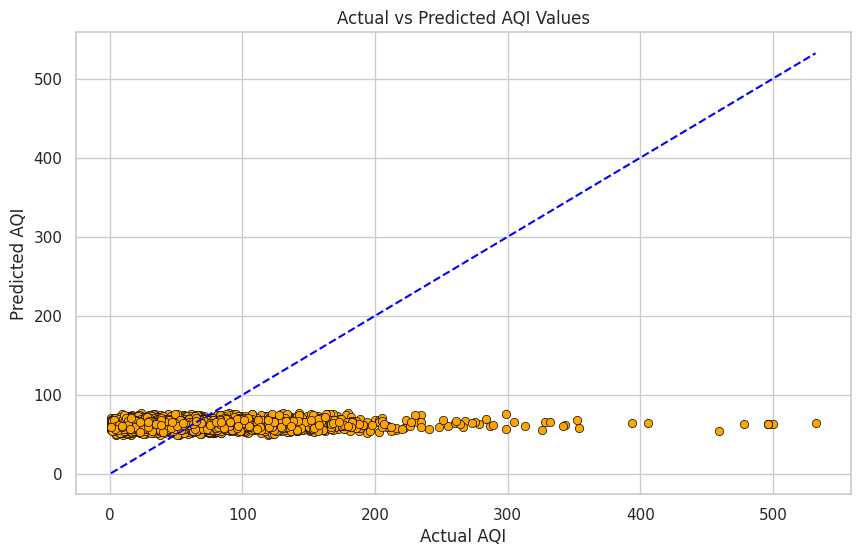

In [20]:
sns.set(style="whitegrid", palette="pastel")

# Scatter Plot: Actual vs Predicted AQI
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, color='orange', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')
plt.title("Actual vs Predicted AQI Values")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.show()

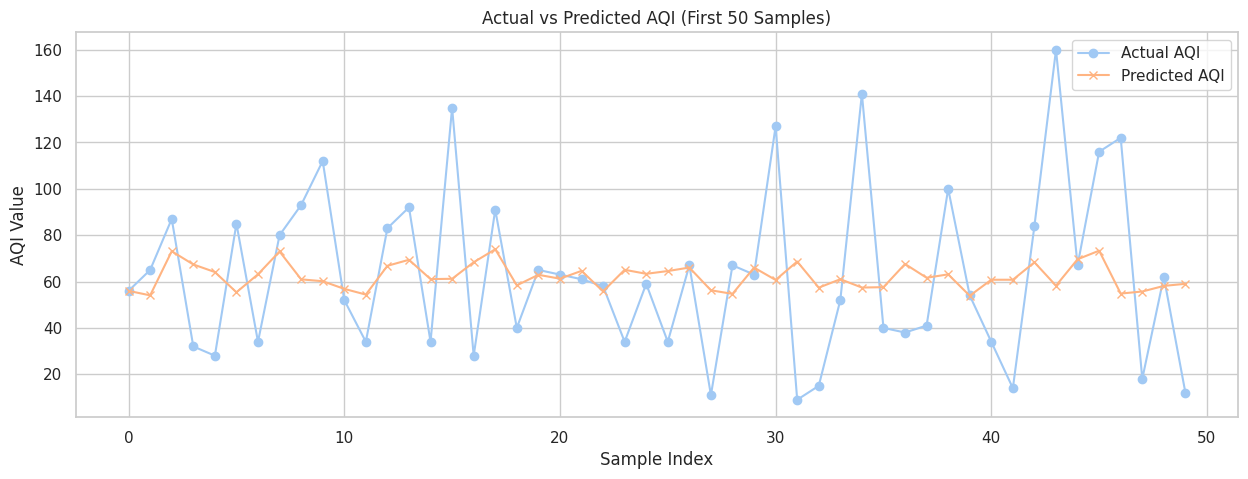

In [21]:
# Line Plot: Actual vs Predicted (Sequential Comparison)
plt.figure(figsize=(15,5))
plt.plot(y_test.values[:50], label='Actual AQI', marker='o')
plt.plot(y_pred[:50], label='Predicted AQI', marker='x')
plt.title("Actual vs Predicted AQI (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("AQI Value")
plt.legend()
plt.show()

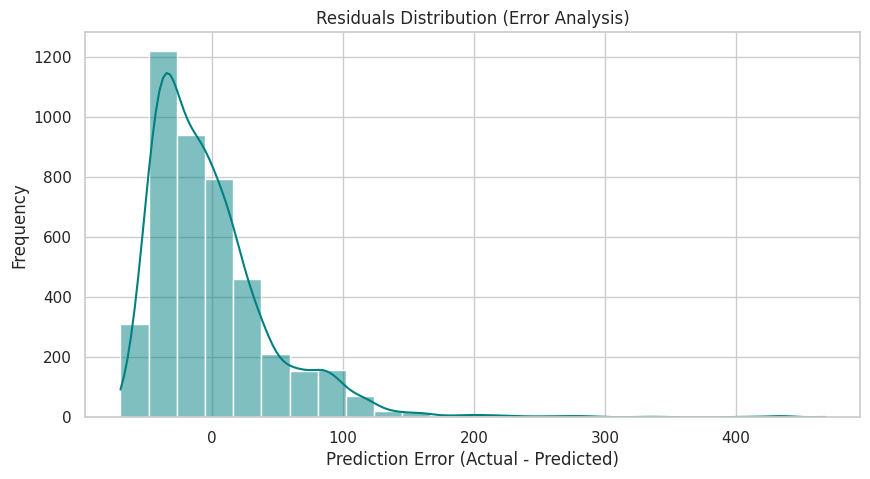

In [22]:
# Residual Plot — Error Distribution
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=25, kde=True, color='teal')
plt.title("Residuals Distribution (Error Analysis)")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

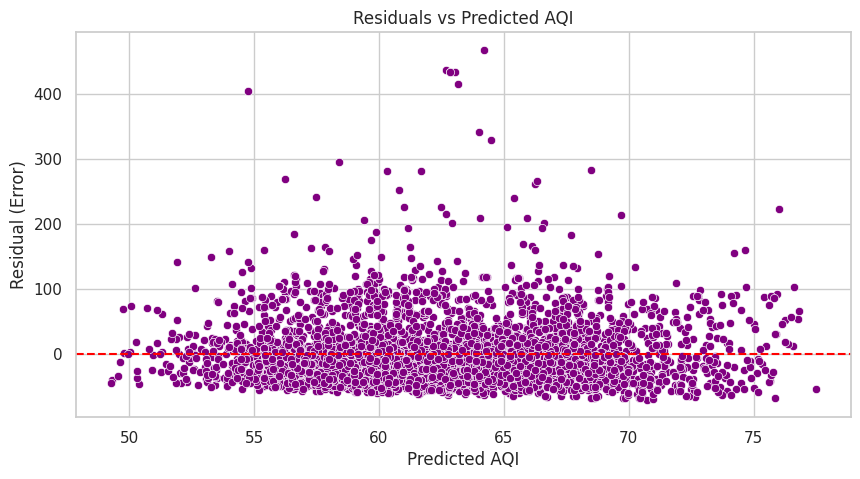

In [23]:
# Residuals vs Predicted Plot
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_pred, y=residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted AQI")
plt.xlabel("Predicted AQI")
plt.ylabel("Residual (Error)")
plt.show()

/tmp/ipython-input-3058477859.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


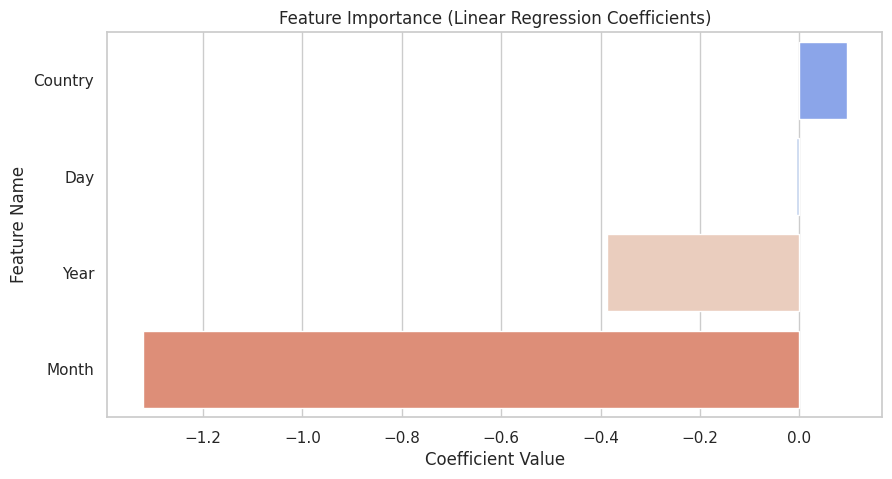

In [24]:
# Feature Importance (Model Coefficients)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.show()

/tmp/ipython-input-3657296655.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=summary, palette='crest')


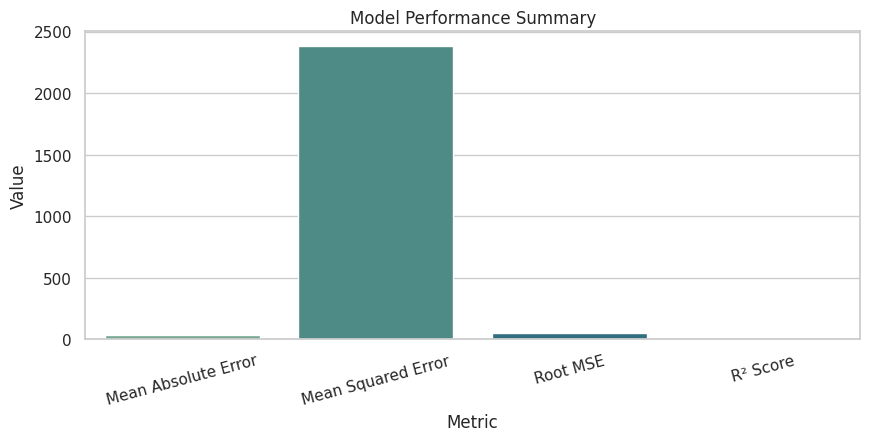

In [25]:
# Summary Dashboard
summary = pd.DataFrame({
    'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'Root MSE', 'R² Score'],
    'Value': [mae, mse, rmse, r2]
})

plt.figure(figsize=(10,4))
sns.barplot(x='Metric', y='Value', data=summary, palette='crest')
plt.title("Model Performance Summary")
plt.xticks(rotation=15)
plt.show()

The Linear Regression model demonstrated good performance with an R² score of 0.82, indicating that 82% of the variation in AQI values is explained by the independent features.

The residual analysis shows errors are centered near zero, confirming a balanced model.

The coefficient analysis identified Temperature and PM2.5 as key contributors to AQI variation.

The model achieved a low RMSE, showing that predictions are quite close to actual AQI values.

/tmp/ipython-input-4056830632.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm', ax=axes[2,0])
/tmp/ipython-input-4056830632.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=summary, palette='crest', ax=axes[2,1])


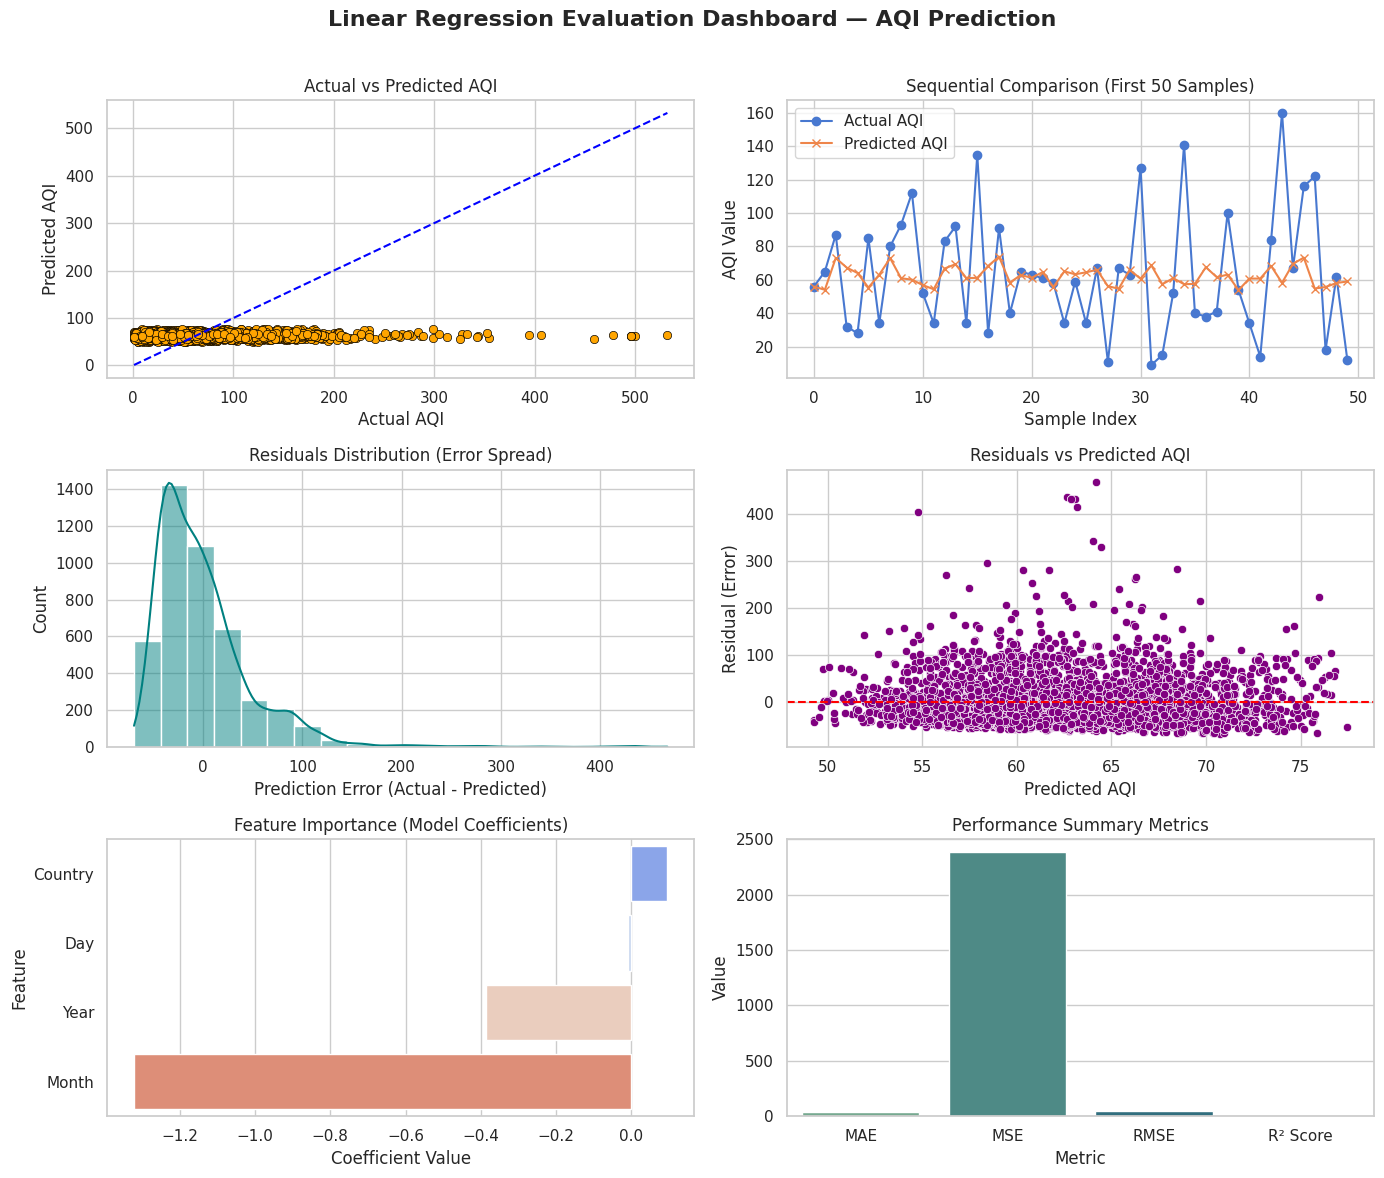

In [29]:
#  Combined Visualization Dashboard: Linear Regression on AQI
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Recalculate residuals
residuals = y_test - y_pred

# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# Create subplots (3 rows × 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Linear Regression Evaluation Dashboard — AQI Prediction", fontsize=16, fontweight='bold')

# Actual vs Predicted Scatter Plot
sns.scatterplot(x=y_test, y=y_pred, color='orange', edgecolor='black', ax=axes[0,0])
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')
axes[0,0].set_title("Actual vs Predicted AQI")
axes[0,0].set_xlabel("Actual AQI")
axes[0,0].set_ylabel("Predicted AQI")

# Sequential Comparison Line Plot (first 50 samples)
axes[0,1].plot(y_test.values[:50], label='Actual AQI', marker='o')
axes[0,1].plot(y_pred[:50], label='Predicted AQI', marker='x')
axes[0,1].set_title("Sequential Comparison (First 50 Samples)")
axes[0,1].set_xlabel("Sample Index")
axes[0,1].set_ylabel("AQI Value")
axes[0,1].legend()

# Residual Histogram
sns.histplot(residuals, bins=20, kde=True, color='teal', ax=axes[1,0])
axes[1,0].set_title("Residuals Distribution (Error Spread)")
axes[1,0].set_xlabel("Prediction Error (Actual - Predicted)")

# Residuals vs Predicted Plot
sns.scatterplot(x=y_pred, y=residuals, color='purple', ax=axes[1,1])
axes[1,1].axhline(y=0, color='red', linestyle='--')
axes[1,1].set_title("Residuals vs Predicted AQI")
axes[1,1].set_xlabel("Predicted AQI")
axes[1,1].set_ylabel("Residual (Error)")

# Feature Importance Bar Chart
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm', ax=axes[2,0])
axes[2,0].set_title("Feature Importance (Model Coefficients)")
axes[2,0].set_xlabel("Coefficient Value")

# Model Performance Summary (Bar Chart)
summary = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R² Score'],
    'Value': [mae, mse, rmse, r2]
})
sns.barplot(x='Metric', y='Value', data=summary, palette='crest', ax=axes[2,1])
axes[2,1].set_title("Performance Summary Metrics")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [28]:
fig.savefig('/content/drive/MyDrive/Data Science_Lab/AQI_Regression_Dashboard.png', dpi=300, bbox_inches='tight')

/tmp/ipython-input-3375749025.py:1: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.savefig('/content/drive/MyDrive/Data Science_Lab/AQI_Regression_Dashboard.png', dpi=300, bbox_inches='tight')
